# S3 - After-class Exercises: Python Basics and SC Applications - Part II (Solution)

---
## Instructions:
Most of the exercises presented here allows you to practice basic Python programming for some applications in Operations Management and Logistics.

For each exercise, you have a code cell for the response underneath it, where you should write your answer between the lines containing `### start your code here ###` and `### end your code here ###`. Your code can contain one or more lines and you can execute this cell in order to complete the exercise. To execute the cell, you can type `Shift+Enter` or press the play button in the toolbar above. Your results will appear right below this response cell.

NOTE: Please pay attention to the variable name of the output you would need to provide under each question. You must use the same variable name for the output so that the result can be printed out correctly.

---
## Aggregate Planning 

Production planning is usually done at an aggregate level, for both products and resources. The objective of aggregate planning or so called *sales and operations planning (S&OP)* is to meet forecasted demand while minimizing cost over the planning period.
The concept of aggregated planning is aimed at achieving a balance between demand and supply. Distinct but similar products are combined into aggregate product families that can be planned for together so as to reduce planning complexity.

Using information about forecast demand of similar products, a logical overall unit measuring sales and output, a method for determining costs, capacity planning results, among others, a company makes the following determinations through aggregate planning:

* **Production quantity** from regular time, overtime, and subcontracted time: used to
determine number of workers and supplier purchase levels;
* Inventory held: used to determine the warehouse space and working capital
required;
* **Backlog/stockout quantity:** used to determine customer service levels;
* **Workforce Hired/Laid Off:** used to determine any labor issues to be encountered;
* **Machine capacity increase/decrease**: used to determine if new production equipment should be purchased or idled.

In this exercise, you will be given an illustrative situation and perform several steps to develop an aggregate plan. 

### Exercise 1.1: Equivalent Units vs Actual Production Units

Since the decisions that go into preparing aggregate plans are strategics in nature, they cannot be mate separately for each of a company's product. Rather, they must include all products. or at leat a large family of products. The **aggregate production plan (APP)** must therefore be stablished using *equivalent units* rather than the actual *production units*. Equivalent units (EU) are the reference units into which all the products of a company are converted. 

Consider a company which produce three diferent types of desks, as shown below. One can recognize that manufacturing a corner workstation requires more capacity resources (employees hours and machine capacity) than a stand along desk. 

<div>
  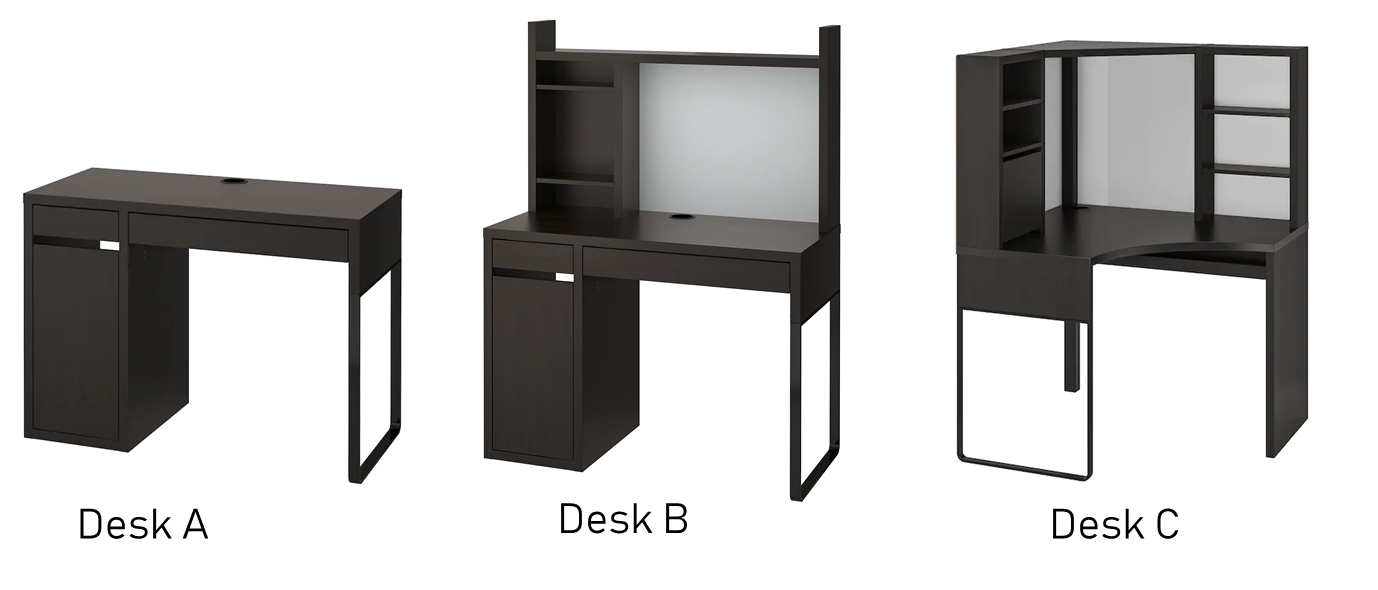
</div>

The first step to develop our APP is to express our forecast demand in EU. In this exercise you are provided with a dictionary which contains the forecast demand in production units for each one of the tree products (Desk A, Desk B and Dssk C) over a planning horizon of 12 periods, and the conversion of each production unit into EU. Using the dictionary `forecast_dem`, create a list with the aggregated forecast demand in EU. Each element of this list is computed as follows:

$$AF_t=F_{t}^{(Desk A)}* EU^{(Desk A)}+F_{t}^{(Desk B)}* EU^{(Desk B)}+F_{t}^{(Desk B)}* EU^{(Desk B)}$$

where:
* $AF_t$: aggregated forecast in EU for period t;
* $F_{t}^{(Desk)}$: forecast demand for period $t$ of the corresponding product type;
* $EU^{(Desk)}$: EU per production unit of the corresponding product type.


In [55]:
# Dict. format: {'product_name': {"eu": (number) equivalent units, "forecast": (list) forecast demand in prod. units}, }
forecast_dem = {"desk_A": {'eu': 1, "forecast":[119,  89, 111, 106, 153, 193, 173,  91, 143, 121, 170,  92]},
                "desk_B": {'eu': 1.5, "forecast":[59,  80,  57, 116, 118,  78,  51,  69,  76,  90, 109,  54]},
                "desk_C": {'eu': 3, "forecast":[47, 63, 47, 61, 66, 56, 41, 67, 73, 74, 73, 78]}}
                           
                           
### start your code here ####
agg_forecast = [(forecast_dem["desk_A"]["eu"] * forecast_dem["desk_A"]["forecast"][t] + \
                forecast_dem["desk_B"]["eu"] * forecast_dem["desk_B"]["forecast"][t]+ \
                forecast_dem["desk_C"]["eu"] * forecast_dem["desk_C"]["forecast"][t]) for t in range(12)]
                           
print("Aggregated forecast is: " , agg_forecast)                          
### end your code here ####

Aggregated forecast is:  [348.5, 398.0, 337.5, 463.0, 528.0, 478.0, 372.5, 395.5, 476.0, 478.0, 552.5, 407.0]


### Exercise 2.1: Strategies for Aggregate planning

In general, a company attempts to use its capacity and inventory to best meet demand. Therefore, the fundamental trade-offs relevant for a planner include:

* Capacity (regular time, overtime, subcontracted)
* Inventory
* Backlog/lost sales because of delay.

Methods for aggregate planning can be based on the empirical knowledge of the planners or on mathematical models. Classical strategies for aggregate production planning include the *chase demand startegy*, the *production level strategy* and *mixed startegies*.  

* **Chase demand strategy** is based on using capacity as a lever. With the help of this strategy, we match output rates to the demand forecast for each period. Typically, we can vary workforce levels or production rate. Such a strategy is common in
service organizations. 
* **Production Level strategy** is based on using inventory as a lever. With the help of this strategy, a stable workforce and machine capacity are maintained with a constant output rate. While daily production is steady, we use inventory as buffer. Stable production tends to lead to better quality and productivity.

In this exercise, you will start develop a simplified aggreated plan based on the production level strategy. You are required to populate the following dictionary which will include all relevant information of the plan.


In [59]:
APP = {'demand': [0] + agg_forecast,
       'output': [],
       'inventory': [50],
       'stockout': [0] ,
       'employees': [5]}

print(APP)

{'demand': [0, 348.5, 398.0, 337.5, 463.0, 528.0, 478.0, 372.5, 395.5, 476.0, 478.0, 552.5, 407.0], 'output': [], 'inventory': [50], 'stockout': [0], 'employees': [5]}


Each key of the dictionary represent an element of the aggregated plan. You must complete each item of the dictionary according the following instructions:

* `'demand': list of 13 elements`. This represents the demand over the planning horizon. It includes the aggregate forecast in EU for period 0 (initial) and for periods 1-12. This item is already complete.
* `'output': list of 13 elements`. This represent the quantity (in EU) to be produced in each period. The output in period 0 =0. As for the production level startegy, to determine the quantity to be produced in each period from 1 to 12, we have to: add up the aggregate forcast demand, substract the initial inventory on hand, and then divide this quantity by the number of periods of the planning horizon (i.e., 12).
* `'inventory': list of 13 elements`. This corresponds to the inventory on hand at the end of each period. The initial inventory is already indicated as  50 EU. For each period $t$, the inventory on hand can be calculated as the inventory at the end of period $t-1$, plus the output at period $t$, minus demand in period $t$. In case this result is a negative value,  it is record as `stockout`, and inventory is set to 0. 
* `employees: list of 13 elements`. This corresponds to the number of employees required per time period. The company has 5 employees currently, each of them capable of producing 50 EU per period.

In [60]:
### start your code here ####

# computing output
prod_level =  round((sum(APP['demand'])- APP['inventory'][0]) /12)
APP['output'] = [0] + [prod_level]*12

# computing inventory levels
for t in range(1,13):
    APP['inventory'].append(max(0,APP['inventory'][t-1] + APP['output'][t] - APP['demand'][t]))
    
# computing stockout levels
for t in range(1,13):
    APP['stockout'].append(max(0, APP['demand'][t] -  APP['inventory'][t-1] - APP['output'][t]))
    
# number of employees required
for t in range(1,13):
    APP['employees'].append(APP['output'][t]/50)

### end your code here ####


print('Dictionary with the aggregate plan: ', APP)


Dictionary with the aggregate plan:  {'demand': [0, 348.5, 398.0, 337.5, 463.0, 528.0, 478.0, 372.5, 395.5, 476.0, 478.0, 552.5, 407.0], 'output': [0, 432, 432, 432, 432, 432, 432, 432, 432, 432, 432, 432, 432], 'inventory': [50, 133.5, 167.5, 262.0, 231.0, 135.0, 89.0, 148.5, 185.0, 141.0, 95.0, 0, 25.0], 'stockout': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25.5, 0], 'employees': [5, 8.64, 8.64, 8.64, 8.64, 8.64, 8.64, 8.64, 8.64, 8.64, 8.64, 8.64, 8.64]}
